In [1]:
author = 'Devyash Lodha'
title = 'Building a Search Engine - Part 5'
lastModified = '2025-02-09T20:56:17.277Z'
published = '2035-02-08T21:56:17.277Z'

Search engines are ubiquitous. Google, Bing, Yahoo, you name it, all of these are internet-wide search engines. Even your favorite social media platforms have a search functionality. How do they work? How can we build our own? And how can we build a search engine which is cheap and easy to run?

Previously, we built a simple search engine with a reverse index. However, our index was huuuumongous! In this section, we will look into simple ways we can optimize our methods.

## Not Everything needs to be Indexed 😮‍💨

In a textbook, indexes are small, maybe a few pages, or 50 pages at the most. If the editors attempted to index every single term in a book, and every single location that term can be found, the index would likely be larger than the textbook itself. Obviously, this isn't practical.

Instead, authors and editors have *discretion* on which terms and words are important enough to decide to index. Authors and editors also have the *discretion* of deciding whether an ocurrence of a term on a page is enough to index it.

When building a search engine, how can we replicate *discretion*? The search engine does not normally have access to the author or editors to build an index of a page. It has to figure out a way for itself.


> **discretion**: the freedom to decide what should be done in a particular situation:
> 
> "a pass-fail grading system may be used at the discretion of the department"

**A key challenge in search is optimizing our data structures for maximum effectiveness while discarding as much unnecessary data as possible.**

## Not all Words are Equal ⚖️

Not every word carries the same weight in a search engine. Some words provide rich context, while others add little or no value. If we examine the inverse index from our naive approach, we notice a lot of junk words—common words that don’t help in finding relevant information.

Take a look at this sentence:

```
"Moreover, in most languages such as English, we use lots of words which add little meaning."
```

Now, think about the actual value of the following words:

```
🚫 "Moreover", "in", "most", "such", "as", "we", "use", "lots", "of", "which"
✅ "languages", "English", "words", "add", "little", "meaning"
```

These words don’t significantly change the meaning much. They act as glue but don’t carry much weight when searching for key concepts. So how do we prune our reverse index to store only the words that matter?

## Word Frequency and Stopwords 🤔

𝒇 Common words, often called stopwords, appear frequently but don’t significantly change the meaning of a sentence. In contrast, less common words carry more weight because they help differentiate between topics.

🔍 Example: If you search for *"energy crisis"*, the words "energy" and "crisis" are far more useful than "the", "in", or "of", which appear in almost every document.

⁉️ So, how do we quantify which words are important and which ones can be ignored?

## Exploiting Histograms 📊

A dirt simple approach is to simply count the word ocurrences throughout our corpus. By building a **histogram** of **word frequency**, we can analyze and see which words appear frequently, and which words appear rarely.

Once we have these counts, we can:
* ✅ Ignore extremely common words (like "the", "in", "of").
* ✅ Prioritize rare but meaningful words (like "mitochondria", "photosynthesis").

Let's build! To build a histogram, we simply 

```javascript
const histogram = new Map();

for (const article of corpus) {
  const {
    text,
    title
  } = article;
  
  // Tokenize the text
  const tokens = tokenize(normalize(text));

  // Add or increment the count of each token in the histogram map
  for (const token of tokens) {
    histogram.set(token, (histogram.get(token) || 0) + 1);
  }
}
```

## Let's Explore the Vocabulary of our Corpus!

## Offline Analysis

I used Python and Matplotlib to randomly sample tokens from the Enron emails dataset. I used the samples to generate a bar graph of tokens, sorted by their ocurrence from greatest to least.

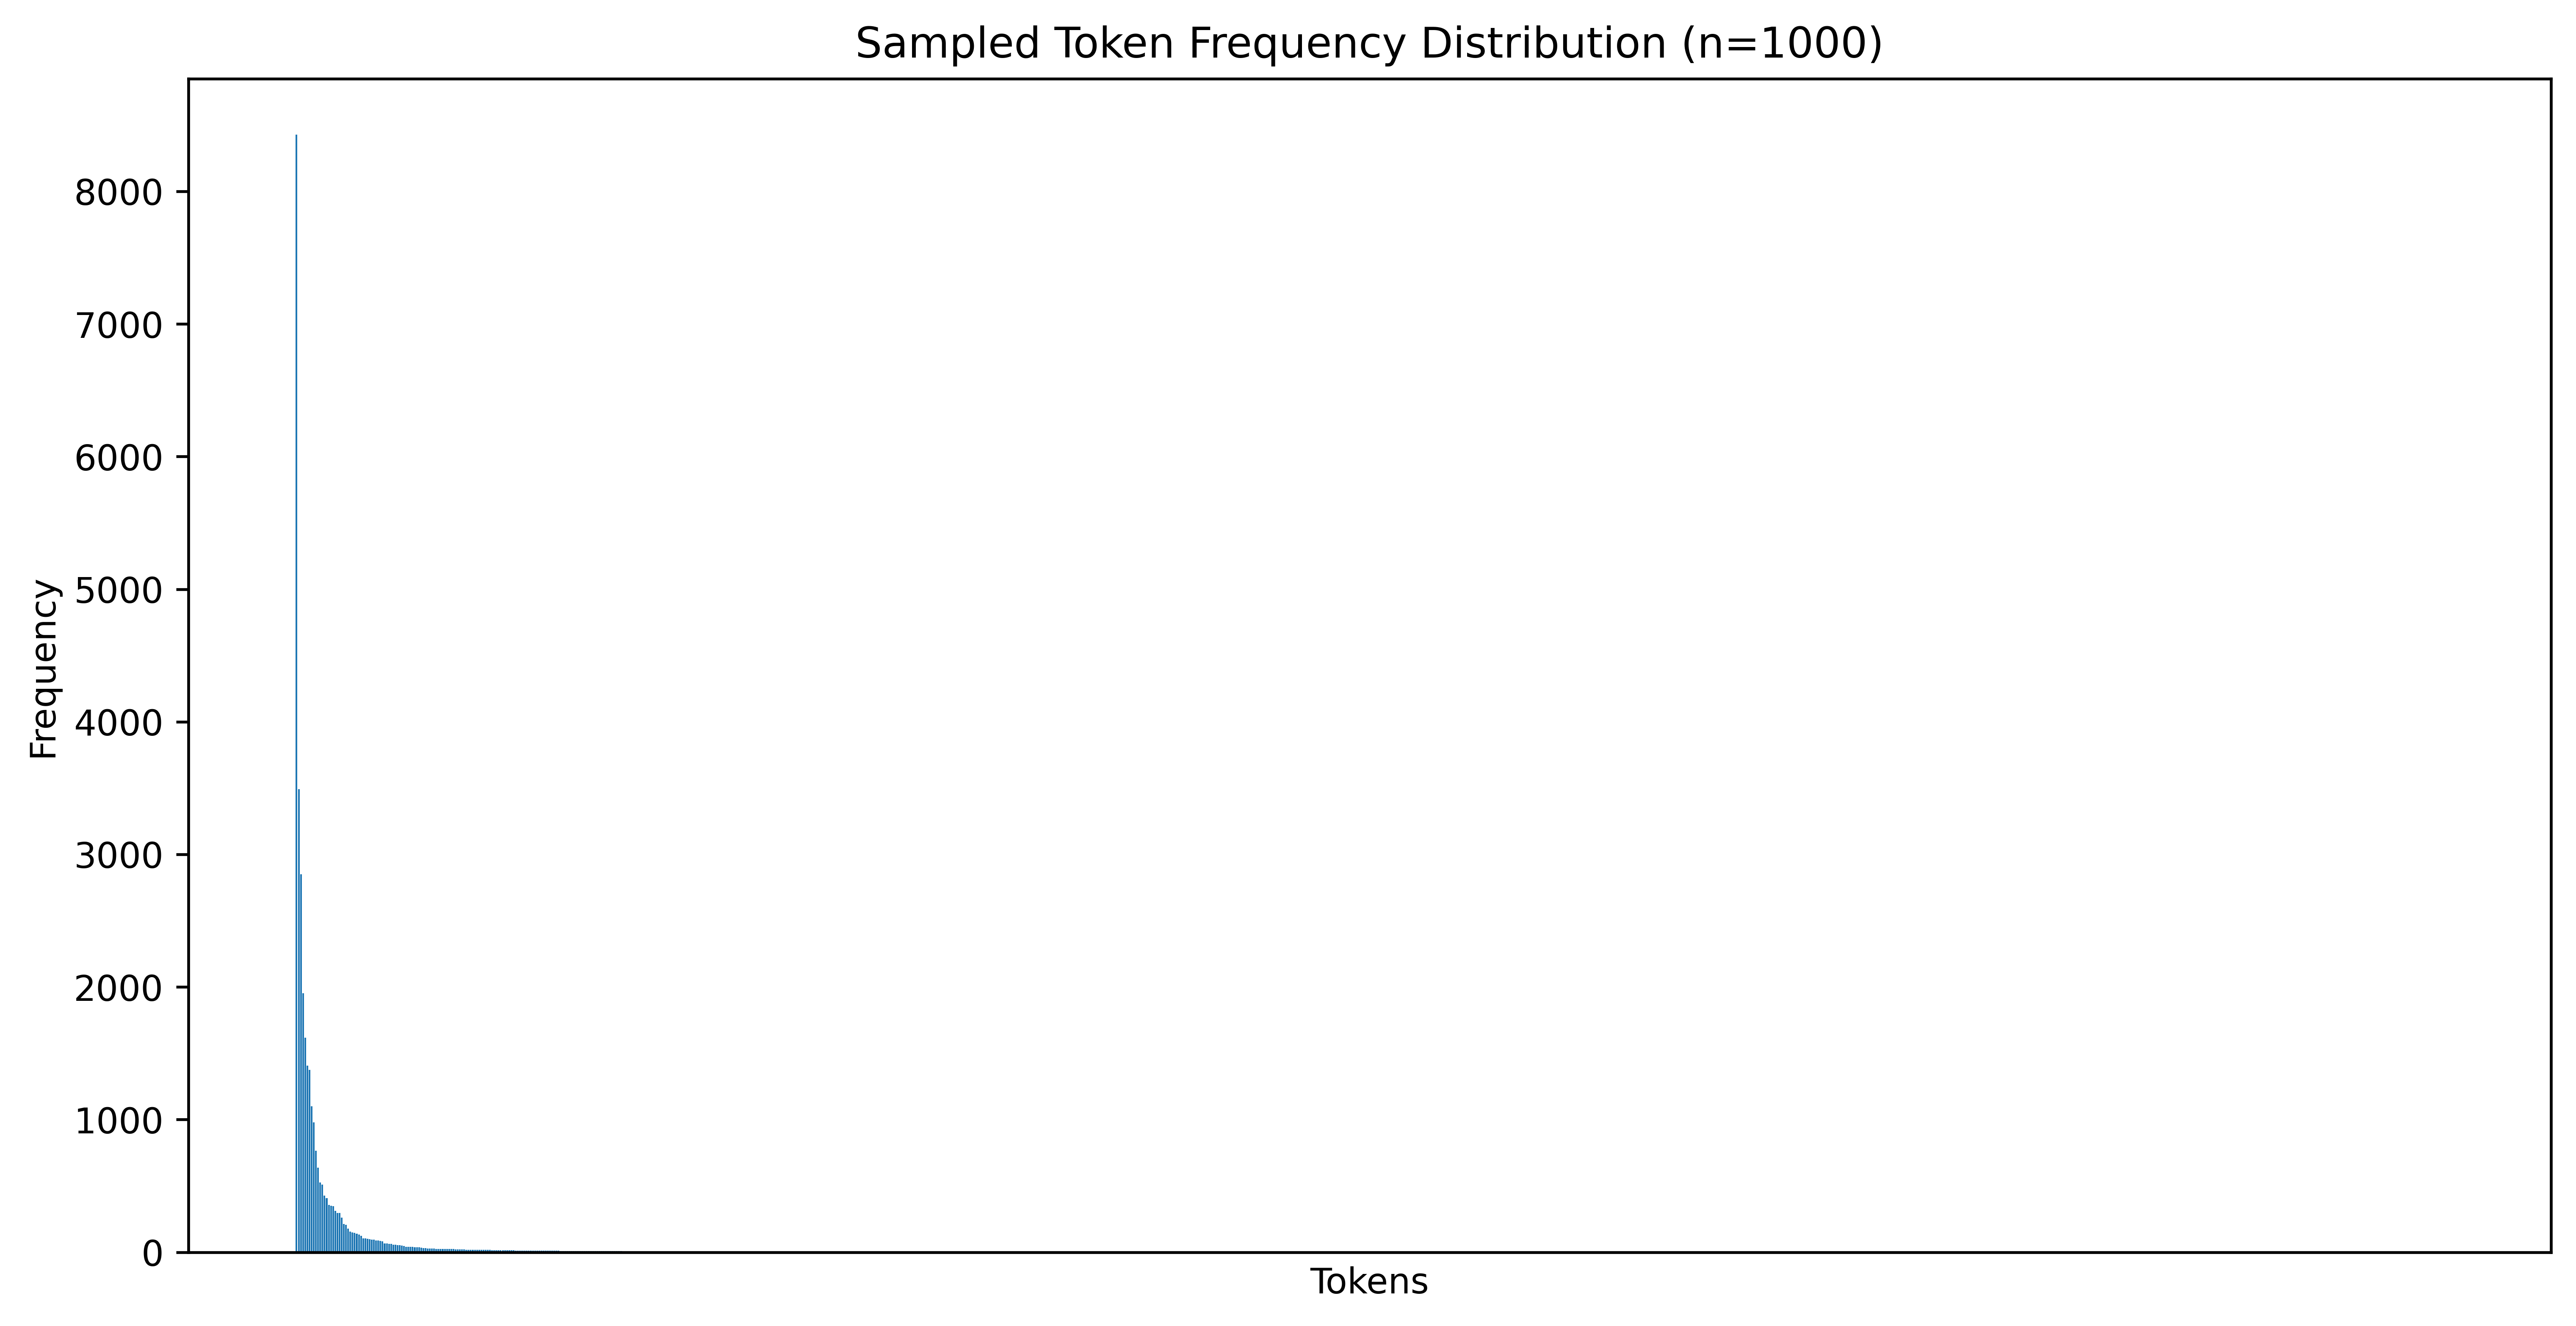

It turns out that this distribution closely resembles [Zipf's Law](https://en.wikipedia.org/wiki/Zipf%27s_law).

## [Zipf's Law](https://en.wikipedia.org/wiki/Zipf%27s_law)

According to Wikipedia,

> **Zipf's law** is an empirial law stating that when a list of measured values is sorted in decreasing order, the value of the n-th entry is often approximately inversely proportional to n.

### What does Zipf's Law mean?

$$f_\text{word}\propto\frac{1}{\text{word rank}}$$

We can rephrase this as:

$$\text{word rank}\propto\frac{1}{f_\text{word}}$$

**High frequency words** (left side of the graph above) are common words like "the", "and", etc.  
  
**Low frequency words** (right side of the graph above) are uncommon words, which carry more meaning and can help refine searches.

<br />

Can we can use Zipf's law to significantly reduce our index by focusing on the tokens which matter the most? Let's prototype with a static rule where we index only the $n$ words with the highest scores.


## Thoughts scratchpad



English and most languages are quite wordy. We can remove a lot of the common words since they add little value to the context. But how do we know what value a word adds to the context? There are a few different methods that we can use:

* **TF-IDF (Term Frequency-Inverse Document Frequency)**: among the simplest of the ranking functions. Many of the more sophisticated ranking functions are variants of this.
* **BM25 (Okapi BM25)**: refined version of TF-IDF, which adds saturation and frequency normalization.
* **Word Embeddings (Word2vec, GloVe, FastText)**: capture semantics instead of just term frequency, but more expensive to compute
* **Entropy-Based Weighting**: measures how uniformly a word appears in documents. Words appearing across more documents are likely less important

There are many more methods, some even involving machine learning. However, for simplicity, we will use TF-IDF in this project, and may switch it out for a better method later on.